In [ ]:
# loading libraries for data manipulation
import numpy as np
import pandas as pd

# loading libraries for data visualization
import matplotlib.pyplot as plt
from plotnine import *

# import tensorflow and keras packages
import tensorflow as tf
from tensorflow import keras

import warnings
warnings.filterwarnings('ignore')

We will load the MNIST data again. This time, we will change the labels to be in a more standardized form. 

In [4]:
# Load MNIST data from keras.datasets
(X_train_mnist, y_train_mnist), (X_test_mnist, y_test_mnist) = keras.datasets.mnist.load_data()

X_train_mnist = X_train_mnist.reshape(-1, 28*28).astype('float32') / 255.0
X_test_mnist = X_test_mnist.reshape(-1, 28*28).astype('float32') / 255.0

# Convert y labels to one-hot encoded vectors
y_train_mnist = keras.utils.to_categorical(y_train_mnist, num_classes=10)
y_test_mnist = keras.utils.to_categorical(y_test_mnist, num_classes=10)



Regularization techniques ensure that a deep neural network is generalized - avoids overfitting in particular. Some techniques we can employ:
- Penalization
- Dropout
- Batch Normalization
- Early Stopping

Let's first build a deep neural network to classify digits without any regularization

In [4]:
model = keras.Sequential([
    keras.layers.Dense(256,activation='relu',input_shape=(784,)),
    keras.layers.Dense(256,activation='relu'),
    keras.layers.Dense(10,activation='softmax')
])

model.compile(loss='categorical_crossentropy', 
              optimizer='adam', # keras.optimizers.adam(0.001) for example if I want to define a LR, otherwise it's pre-defined
              metrics=['accuracy'])

history_no_reg = model.fit(X_train_mnist, y_train_mnist,
                           epochs=20, verbose=1, batch_size=128,
                           validation_data=(X_test_mnist, y_test_mnist))

Epoch 1/20
469/469 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.8684 - loss: 0.4759 - val_accuracy: 0.9598 - val_loss: 0.1283
Epoch 2/20
469/469 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.9702 - loss: 0.1015 - val_accuracy: 0.9726 - val_loss: 0.0836
Epoch 3/20
469/469 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.9811 - loss: 0.0607 - val_accuracy: 0.9743 - val_loss: 0.0795
Epoch 4/20
469/469 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.9862 - loss: 0.0434 - val_accuracy: 0.9757 - val_loss: 0.0766
Epoch 5/20
469/469 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.9903 - loss: 0.0303 - val_accuracy: 0.9799 - val_loss: 0.0645
Epoch 6/20
469/469 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.9930 - loss: 0.0227 - val_accuracy: 0.9760 - val_loss: 0.0782
Epoch 7/20
469/469 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.9935 - loss: 0.0190 - val_accuracy: 0.9788 - val_loss: 0.0738
Epoch 8/20
469/469 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.9953 - loss: 0.0148 - val_accuracy: 0.

Let's introduce L2 weight regularization. This is theoretically a weight decay which will ensure that weights remain small and not one neuron influences inferences. 

In [8]:
model = keras.Sequential([
    keras.layers.Dense(256,activation='relu',kernel_regularizer=keras.regularizers.l2(0.001),input_shape=(784,)), # the 0.001 is the lambda (strength)
    keras.layers.Dense(256,activation='relu',kernel_regularizer=keras.regularizers.l2(0.001)),
    keras.layers.Dense(10,activation='softmax')
])

model.compile(loss='categorical_crossentropy', 
              optimizer='adam', # keras.optimizers.adam(0.001) for example if I want to define a LR, otherwise it's pre-defined
              metrics=['accuracy'])

history_l2_reg = model.fit(X_train_mnist, y_train_mnist,
                           epochs=20, verbose=1, batch_size=128,
                           validation_data=(X_test_mnist, y_test_mnist))

Epoch 1/20
469/469 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.8622 - loss: 0.9051 - val_accuracy: 0.9579 - val_loss: 0.3602
Epoch 2/20
469/469 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.9623 - loss: 0.3253 - val_accuracy: 0.9680 - val_loss: 0.2504
Epoch 3/20
469/469 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.9708 - loss: 0.2318 - val_accuracy: 0.9716 - val_loss: 0.2040
Epoch 4/20
469/469 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.9765 - loss: 0.1928 - val_accuracy: 0.9748 - val_loss: 0.1861
Epoch 5/20
469/469 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.9768 - loss: 0.1783 - val_accuracy: 0.9720 - val_loss: 0.1829
Epoch 6/20
469/469 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.9779 - loss: 0.1676 - val_accuracy: 0.9749 - val_loss: 0.1706
Epoch 7/20
469/469 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.9787 - loss: 0.1587 - val_accuracy: 0.9719 - val_loss: 0.1777
Epoch 8/20
469/469 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.9803 - loss: 0.1530 - val_accuracy: 0.

Let's also introduce Dropout. Dropout with a probability p will randomly drop neurons from network during training. 

In [9]:
model = keras.Sequential([
    keras.layers.Dense(256,activation='relu',kernel_regularizer=keras.regularizers.l2(0.001),input_shape=(784,)), 
    keras.layers.Dropout(0.2), # 20% dropout
    keras.layers.Dense(256,activation='relu',kernel_regularizer=keras.regularizers.l2(0.001)),
    keras.layers.Dropout(0.2),
    keras.layers.Dense(10,activation='softmax')
])

model.compile(loss='categorical_crossentropy', 
              optimizer='adam', 
              metrics=['accuracy'])

history_l2_drop_reg = model.fit(X_train_mnist, y_train_mnist,
                           epochs=20, verbose=1, batch_size=128,
                           validation_data=(X_test_mnist, y_test_mnist))

Epoch 1/20
469/469 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.8328 - loss: 0.9903 - val_accuracy: 0.9551 - val_loss: 0.3808
Epoch 2/20
469/469 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.9541 - loss: 0.3654 - val_accuracy: 0.9672 - val_loss: 0.2576
Epoch 3/20
469/469 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.9641 - loss: 0.2690 - val_accuracy: 0.9698 - val_loss: 0.2226
Epoch 4/20
469/469 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.9666 - loss: 0.2367 - val_accuracy: 0.9740 - val_loss: 0.2016
Epoch 5/20
469/469 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.9675 - loss: 0.2211 - val_accuracy: 0.9738 - val_loss: 0.1983
Epoch 6/20
469/469 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.9684 - loss: 0.2111 - val_accuracy: 0.9745 - val_loss: 0.1903
Epoch 7/20
469/469 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.9692 - loss: 0.2042 - val_accuracy: 0.9759 - val_loss: 0.1830
Epoch 8/20
469/469 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.9721 - loss: 0.1972 - val_accuracy: 0.

Now, we can compare the models to see if any generalization is observed. 

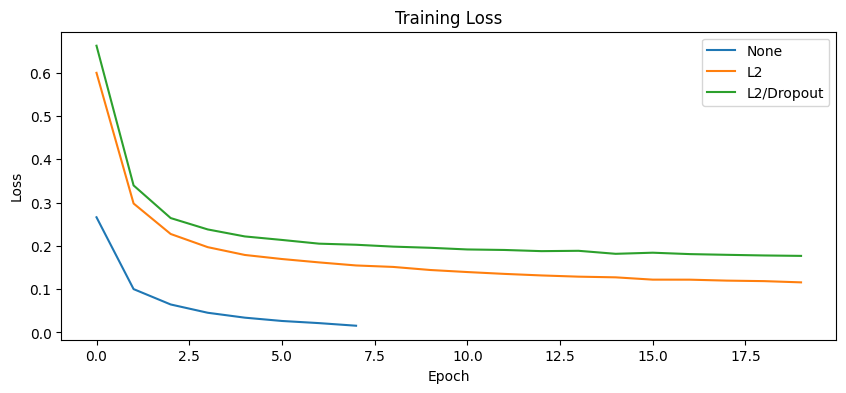

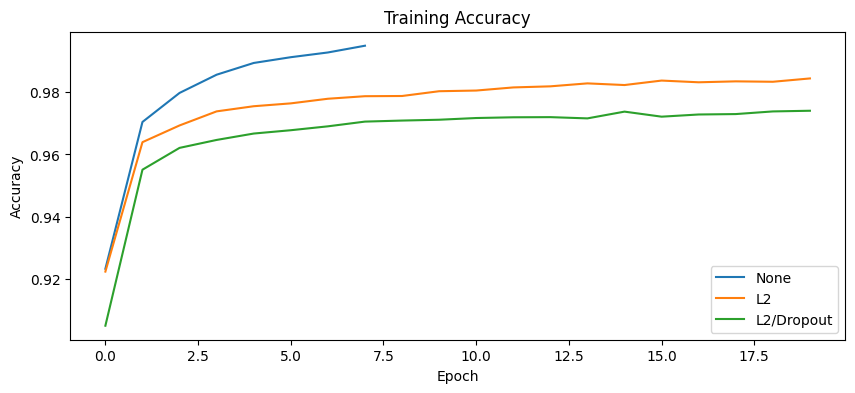

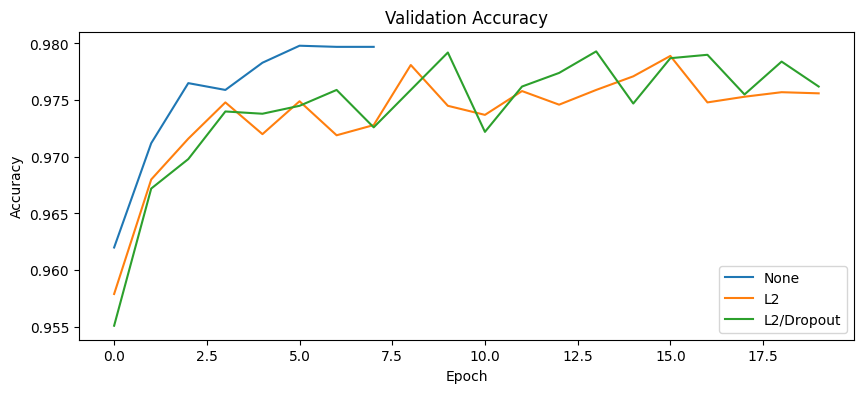

In [11]:

model_history = {"None":history_no_reg.history,
                 "L2":history_l2_reg.history,
                 "L2/Dropout":history_l2_drop_reg.history}

# Loss
plt.figure(figsize=(10, 4))
for name in model_history:
    plt.plot(model_history[name]['loss'], label=f'{name}')
plt.title("Training Loss")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.legend()
plt.show()

# Training Accuracy
plt.figure(figsize=(10, 4))
for name in model_history:
    plt.plot(model_history[name]['accuracy'], label=f'{name}')
plt.title("Training Accuracy")
plt.xlabel("Epoch")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

# Accuracy
plt.figure(figsize=(10, 4))
for name in model_history:
    plt.plot(model_history[name]['val_accuracy'], label=f'{name}')
plt.title("Validation Accuracy")
plt.xlabel("Epoch")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

The plots show that training and validation accuracies are closer after model training. Note that with regularization, the model has not reached convergence and could use more training steps. 

Another option would be to use Early Stopping. This mechanism stops training when validation loss stops improving, preventing overfitting. We can use the EarlyStopping callback. 

In [10]:
model = keras.Sequential([
        keras.layers.Dense(256,activation='relu',input_shape=(784,)),
        keras.layers.Dense(256,activation='relu'),
        keras.layers.Dense(10,activation='softmax') # output layer
    ])

model.compile(loss="categorical_crossentropy",
              optimizer="adam", #keras.optimizers.SGD(0.01)
              metrics=["accuracy"])

early_stopping = keras.callbacks.EarlyStopping(
    monitor='val_loss', 
    patience=2,
    restore_best_weights=True
)

history_no_reg = model.fit(X_train_mnist,y_train_mnist,
                           epochs=20,verbose=1,batch_size=128,
                           validation_data=(X_test_mnist,y_test_mnist),
                           callbacks=[early_stopping])

Epoch 1/20
469/469 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.8570 - loss: 0.4990 - val_accuracy: 0.9620 - val_loss: 0.1240
Epoch 2/20
469/469 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.9697 - loss: 0.1039 - val_accuracy: 0.9712 - val_loss: 0.0938
Epoch 3/20
469/469 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.9806 - loss: 0.0644 - val_accuracy: 0.9765 - val_loss: 0.0726
Epoch 4/20
469/469 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.9867 - loss: 0.0432 - val_accuracy: 0.9759 - val_loss: 0.0749
Epoch 5/20
469/469 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.9903 - loss: 0.0324 - val_accuracy: 0.9783 - val_loss: 0.0705
Epoch 6/20
469/469 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.9922 - loss: 0.0237 - val_accuracy: 0.9798 - val_loss: 0.0665
Epoch 7/20
469/469 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.9939 - loss: 0.0191 - val_accuracy: 0.9797 - val_loss: 0.0691
Epoch 8/20
469/469 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.9957 - loss: 0.0142 - val_accuracy: 0.

Our last regularization step (not include data augmentation), is Batch Normalization. This normalizes activations of each layer to mean = 0 and std = 1, per mini-batch. It stabilizes and speeds up training. Note that we can apply Batch Normalization before the activation function is applied. That is, normalize the weight sum and then apply an activation function on top. You can apply Batch Normalization after activation function as well, but be careful as ReLU can result in a lot of 0s.  

In [6]:
model = keras.Sequential([
        keras.layers.Dense(256,input_shape=(784,)),
        keras.layers.Activation('relu'),
        keras.layers.BatchNormalization(),
        keras.layers.Dense(256),
        keras.layers.Activation('relu'),
        keras.layers.BatchNormalization(),
        keras.layers.Dense(10),
        keras.layers.Activation('softmax') # output layer
    ])

model.compile(loss="categorical_crossentropy",
              optimizer="adam", #keras.optimizers.SGD(0.01)
              metrics=["accuracy"])

history_batch_norm = model.fit(X_train_mnist,y_train_mnist,
                           epochs=5,verbose=1,batch_size=128,
                           validation_data=(X_test_mnist,y_test_mnist))

Epoch 1/5
469/469 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.8920 - loss: 0.3500 - val_accuracy: 0.9691 - val_loss: 0.0950
Epoch 2/5
469/469 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.9767 - loss: 0.0746 - val_accuracy: 0.9687 - val_loss: 0.0949
Epoch 3/5
469/469 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.9842 - loss: 0.0504 - val_accuracy: 0.9733 - val_loss: 0.0828
Epoch 4/5
469/469 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.9902 - loss: 0.0319 - val_accuracy: 0.9765 - val_loss: 0.0758
Epoch 5/5
469/469 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.9914 - loss: 0.0271 - val_accuracy: 0.9779 - val_loss: 0.0719


In [ ]:
# batch normalization adds additional parameters for the networks to learn
model.summary()

The network now has to learn two new parameters (scale and shift) per node, plus the running running mean and variance but these only need to be tracked not learned. 

Traditionally, the layout for a feed forward neural network should be
1. Define Input Layer
2. Add N Hidden Layers - for each, add L2 regularization, Activation Function, Batch Normalization (before/after activation)
3. Add Dropout between layers (after activation)
4. Define Output Layer with task-depended activation function (softmax for classification, sigmoid for binary, none for regression/linear)
5. Define Optimizer, Loss Function
6. Define Early Stopping parameters